## Keras CNN with CIFAR10 Dataset

**CIFAR10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

**Here are the classes in the dataset:---------------**
    
airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

### Load CIFAR10 data from keras

In [1]:
from keras.datasets import cifar10

(x_train,y_train) , (x_test,y_test)=cifar10.load_data()

Using TensorFlow backend.


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
# Let's explore our data 
import matplotlib.pyplot as plt
%matplotlib inline

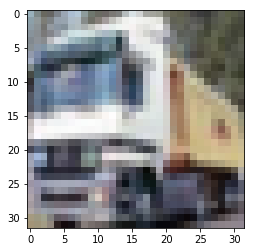

In [7]:
plt.imshow(x_train[1]);

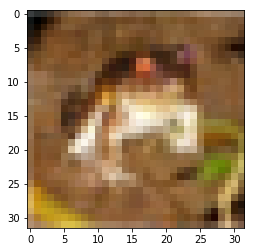

In [8]:
plt.imshow(x_train[0])

In [9]:
y_train[0]

array([6], dtype=uint8)

In [10]:
# Change labels to Onehot encoding

from keras.utils import to_categorical

In [11]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [14]:
x_train.max()

255

In [15]:
# Normalize the data
x_train=x_train/255
x_test=x_test/255

In [12]:
# We don't have to reshape our data as it is already in 4D

## Training The model

In [30]:
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten

In [31]:
model=Sequential()

# add convolution layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 32)        16416     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 32)          16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
__________

In [33]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_accuracy',patience=3)

In [34]:
model.fit(x_train,y_cat_train,verbose=1,epochs=20,callbacks=[early_stopping])

Epoch 1/20
50000/50000 [==============================] - 350s 7ms/step - loss: 1.5819 - acc: 0.4229
Epoch 2/20
50000/50000 [==============================] - 363s 7ms/step - loss: 1.2342 - acc: 0.5579
Epoch 3/20
50000/50000 [==============================] - 343s 7ms/step - loss: 1.0781 - acc: 0.6180
Epoch 4/20
50000/50000 [==============================] - 353s 7ms/step - loss: 0.9720 - acc: 0.6573
Epoch 5/20
50000/50000 [==============================] - 340s 7ms/step - loss: 0.8948 - acc: 0.6847
Epoch 6/20
50000/50000 [==============================] - 279s 6ms/step - loss: 0.6133 - acc: 0.7849
Epoch 12/20
50000/50000 [==============================] - 332s 7ms/step - loss: 0.5433 - acc: 0.8071
Epoch 14/20
50000/50000 [==============================] - 293s 6ms/step - loss: 0.4508 - acc: 0.8390
Epoch 17/20
50000/50000 [==============================] - 286s 6ms/step - loss: 0.4313 - acc: 0.8466
Epoch 18/20
50000/50000 [==============================] - 269s 5ms/step - loss: 0.3816 

**We can tune our model by increasing number of epochs or by trying different optimizer or by increasing convolution layers and increasing number of neurons**

### Evaluating the model

In [35]:
model.metrics_names

['loss', 'acc']

In [36]:
predictions=model.predict_classes(x_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.64      0.68      1000
          1       0.82      0.79      0.80      1000
          2       0.60      0.49      0.54      1000
          3       0.46      0.58      0.52      1000
          4       0.67      0.51      0.58      1000
          5       0.61      0.56      0.59      1000
          6       0.66      0.84      0.74      1000
          7       0.69      0.75      0.72      1000
          8       0.78      0.75      0.76      1000
          9       0.72      0.78      0.75      1000

avg / total       0.67      0.67      0.67     10000



In [39]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 20s 2ms/step


[1.3419294122695924, 0.6699]

**Here we can use dropout to prevent overfitting**